# Week Four - Assignment Centrality Measures

Authors: Naomi Buell and Richie Rivera

## Instructions

*Centrality measures can be used to predict (positive or negative) outcomes for a node.*

*Your task in this week’s assignment is to identify an interesting set of network data that is available on the web (either through web scraping or web APIs) that could be used for analyzing and comparing centrality measures across nodes.  As an additional constraint, there should be at least one categorical variable available for each node (such as “Male” or “Female”; “Republican”, “Democrat,” or “Undecided”, etc.).*

*In addition to identifying your data source, you should create a high level plan that describes how you would load the data for analysis, and describe a hypothetical outcome that could be predicted from comparing degree centrality across categorical groups.*

## Step 1: Identify Data Source

For this assignment, we use the [One Piece Interaction](https://github.com/jonaszeu/one-piece-interaction-data) dataset from jonaszeu on github. It was created by scraping a wiki of the show and documenting every interaction between two characters and categorizes it into an interaction type (Communication, Confrontation, Cooperation, etc). This dataset is available in a few different ways but we will be using the `.csv` that is created as our data source.

First, we import libraries and load the dataset into a graph object.

In [1]:
# Import libraries
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In this dataset, each row corresponds to one interaction (edge) between two characters (nodes). For each node, the available categorical variables are: 
- `Interaction`, which describes the type of interaction between the two characters (e.g. Perception, Communication, Confrontation, Cooperation, Emotional, Indirect, Physical, or Other),
- `Saga`, which describes the saga in which the interaction took place (e.g. East Blue, Alabasta, Sky Island, etc.),
- `Arc`, which describes the smaller story arc in which the interaction took place (e.g. Romance Dawn, Orange Town, Syrup Village, etc.), and
- `Filler`, which indicates whether the interaction took place in a filler episode (True or False).

In [2]:
# Load the dataset directly from github
op_url = 'https://raw.githubusercontent.com/jonaszeu/one-piece-interaction-data/refs/heads/main/one_piece_interactions_1-1085.csv'
op_df = pd.read_csv(op_url)

# Make the Character Names "proper"
for e in ['Character 1', 'Character 2']: op_df[e] = op_df[e].str.title()

# Show a sample of the data
op_df.head()

,Episode,Character 1,Character 2,Interaction,Saga,Arc,Filler
0,1,Luffy,Sailors On A Cruise Ship,Perception,East Blue Saga,Romance Dawn,False
1,1,Luffy,Alvida Pirates,Confrontation,East Blue Saga,Romance Dawn,False
2,1,Luffy,Koby,Communication,East Blue Saga,Romance Dawn,False
3,1,Luffy,Koby,Cooperation,East Blue Saga,Romance Dawn,False
4,1,Koby,Alvida,Confrontation,East Blue Saga,Romance Dawn,False


In [3]:
# Get a total number of characters to get all the nodes
unique_characters = set(list(op_df['Character 1']) + list(op_df['Character 2']))

# Print information on the dataset
print(f"{op_df.shape[0]:,} Edges\n{len(unique_characters):,} Nodes")

28,185 Edges
1,448 Nodes


As there are over 28,000 and 1,400 nodes, we will filter the dataset to be only the `Romance Dawn` Arc and to omit `Filler` (filler episodes are not part of the original manga storyline and are created to fill up airtime while the manga source material is still being published).

In [4]:
# Filtering the dataset
rd_df = op_df.loc[(op_df['Arc'] == 'Romance Dawn') & (~op_df['Filler'])]

# Get a total number of characters to get all the nodes
rd_unique_characters = set(list(rd_df['Character 1']) + list(rd_df['Character 2']))

# Print information on the dataset
print(f"{rd_df.shape[0]:,} Edges\n{len(rd_unique_characters):,} Nodes")

48 Edges
12 Nodes


With our filtered dataset, we can load it into a graph database. Thankfully, NetworkX already has methods to allow to easily load it from a pandas dataframe. With `nx.from_pandas_edgelist()`, we can also add the attributes of each connection which allows us to use it later on.

In [5]:
# Intializing the graph
rd_graph = nx.from_pandas_edgelist(
    rd_df,
    source = 'Character 1',
    target = 'Character 2',
    edge_attr = ['Episode', 'Interaction', 'Saga', 'Arc', 'Filler']
)

We display our graph below.

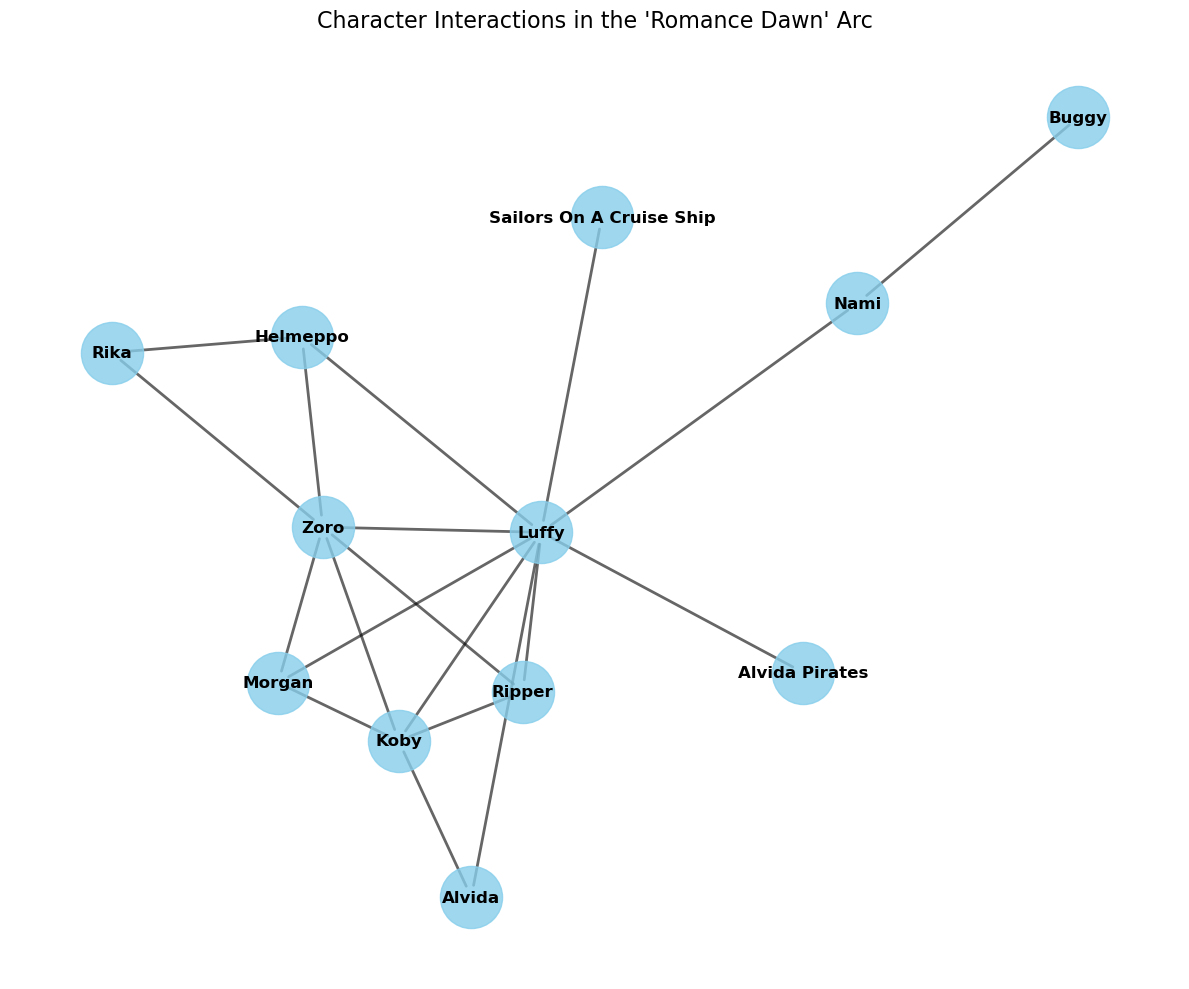

In [6]:
# Set up the figure size
plt.figure(figsize=(12, 10))

# Choose a layout for better node separation
pos = nx.spring_layout(rd_graph, k=0.7, iterations=50) 

# Draw the graph components with custom styling
nx.draw_networkx_nodes(rd_graph, pos, node_size=2000, node_color='skyblue', alpha=0.8)
nx.draw_networkx_edges(rd_graph, pos, width=2, alpha=0.6, arrows=True, arrowsize=20)
nx.draw_networkx_labels(rd_graph, pos, font_size=12, font_family='sans-serif', font_weight='bold')

plt.title("Character Interactions in the 'Romance Dawn' Arc", size=16)
plt.axis('off')
plt.tight_layout()

# Save the plot as a PNG image before showing it
plt.savefig("rd_graph_plot.png")

plt.show()

## Step 2: Analysis plan

We analyze the characters in this network by their degree centrality, which is a measure of how many connections a node has. Below we display the top 10 characters with the highest degree centrality.

In [7]:
# Compute degree
deg = nx.degree(rd_graph)
# Sort the degree by value (number of connections), descending
sorted_deg = sorted(deg, key=lambda x: x[1], reverse=True)
print("\nTop 10 Characters by Degree Centrality (Number of Connections):")
sorted_deg[0:9] # Show the top 10 characters by degree


Top 10 Characters by Degree Centrality (Number of Connections):


[('Luffy', 9),
 ('Zoro', 6),
 ('Koby', 5),
 ('Helmeppo', 3),
 ('Morgan', 3),
 ('Ripper', 3),
 ('Alvida', 2),
 ('Nami', 2),
 ('Rika', 2)]

It makes sense that Luffy, as the main character of the show, has the highest degree centrality.

## Presentation Video

Link to presentation video: [insert].